Implement modules for psc detection. Select traces for spontaneous PSC analysis

In [3]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
# % matplotlib notebook


%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data= pd.read_csv('/data/Good data storage.csv')
data_ana = pd.read_pickle('/data/ana_asso_2Hz_reci')

In [5]:
data_ana

,Before,After,File name,spon_elimi_bef,spon_elimi_aft,elimi
139,"{'spon_trace': [[7.24836129376e-12, 7.23311936...","{'spon_trace': [[2.41018969325e-12, 2.28314548...",2017111401,"[4, 19, 20, 26, 37]","[83, 99, 104]",50
140,"{'spon_trace': [[-1.34301840334e-12, -7.669744...","{'spon_trace': [[-4.22883642292e-12, -4.675780...",2017111402,[],[24],25
141,"{'spon_trace': [[3.65711834722e-12, 8.11839534...","{'spon_trace': [[-2.30733133939e-12, -1.678263...",2017111501,"[2, 13, 17, 19, 27, 32, 39, 41, 44, 50, 51]","[5, 6, 17, 22]",16
142,"{'spon_trace': [[-1.1690424485e-12, -1.2461986...","{'spon_trace': [[2.13503464331e-12, 2.27290005...",2017111601,"[4, 11, 14, 17, 22, 28, 29, 35, 37, 44]","[7, 9, 15, 23, 32, 35]",20
143,"{'spon_trace': [[3.09720524968e-12, 3.63332847...","{'spon_trace': [[-1.72181154365e-12, 2.8502880...",2017111601,"[2, 9, 23, 35]","[42, 51, 57]",30
144,"{'spon_trace': [[2.39954226964e-13, 6.77881699...","{'spon_trace': [[-3.4606716974e-12, 1.58116851...",2017111602,"[0, 2, 4, 13, 15, 16, 41]","[21, 36, 41, 51, 54, 55]",25
145,"{'spon_trace': [[-5.54373447381e-14, 1.9302015...","{'spon_trace': [[3.59281979987e-12, 3.17931376...",2017111001,"[7, 32, 43]",[71],50
146,"{'spon_trace': [[-9.42113681619e-12, -9.236163...","{'spon_trace': [[-6.53588755175e-12, -6.221515...",2017111002,[],[],30


In [8]:
elimi_enter = 25
finish = (elimi_enter - 8) * 3
if elimi_enter < 40:
    start = finish - 30
    print(start, finish)
else:
    start = finish - 60
    print(start, finish)

21 51


In [176]:
spon_elimi_bef = {}
spon_elimi_bef[139] = [4,19,20,26,37]   # 66 126
spon_elimi_bef[140] = []  # 36 96
spon_elimi_bef[141] = [2,13,17,19,27,32,39,41,44,50,51]  # 66 126
spon_elimi_bef[142] = [4,11,14,17,22,28,29,35,37,44] # 36 96
spon_elimi_bef[143] = [2,9,23,35] # 36 96
spon_elimi_bef[144] = [0,2,4,13,15,16,41] # 36 96
spon_elimi_bef[145] = [7,32,43] # 36 96
spon_elimi_bef[146] = [] # 36 96
spon_elimi_aft = {}
spon_elimi_aft[139] = [83,99,104]   # 66 126
spon_elimi_aft[140] = [24]  # 36 96
spon_elimi_aft[141] = [5,6,17,22]  # 66 126
spon_elimi_aft[142] = [7,9,15,23,32,35] # 36 96
spon_elimi_aft[143] = [42,51,57] # 36 96
spon_elimi_aft[144] = [21,36,41,51] # 36 96
spon_elimi_aft[145] = [71] # 36 96
spon_elimi_aft[146] = [] # 36 96

In [6]:
choice = 144
spon_list = data_ana.After.loc[choice]['spon_trace'].copy()

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


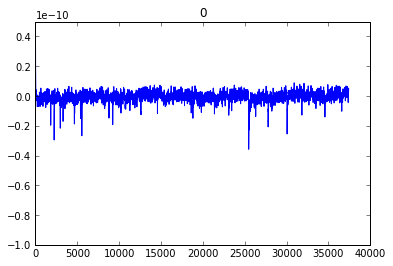

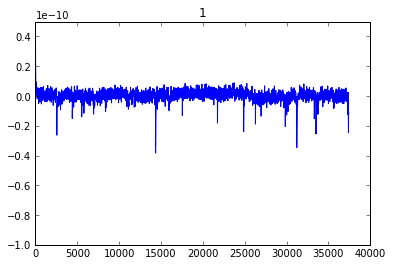

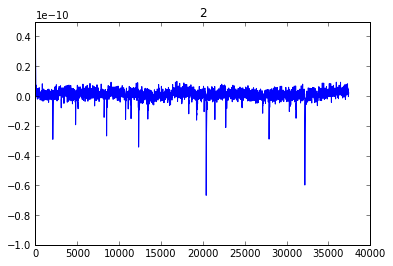

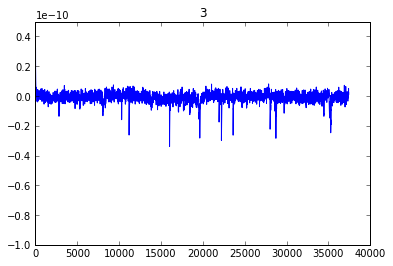

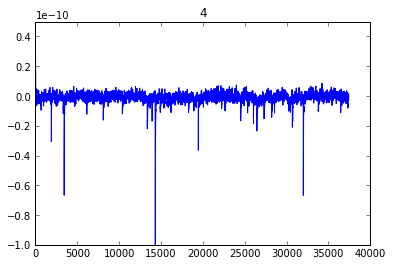

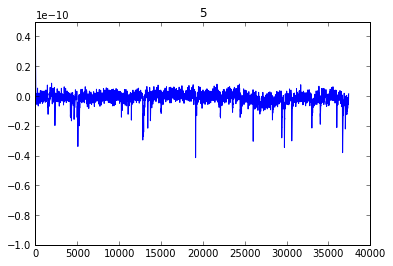

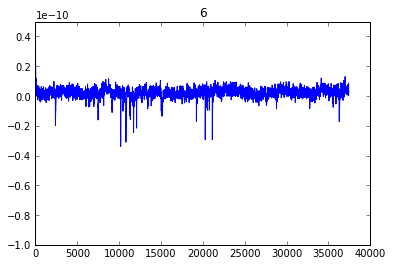

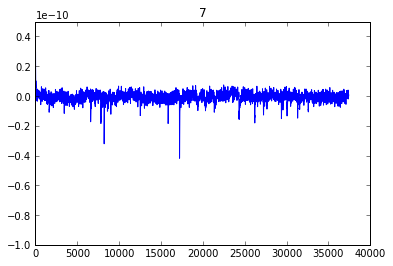

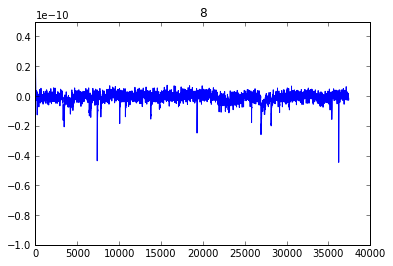

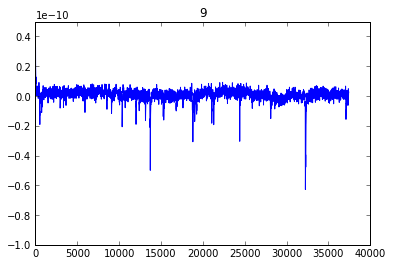

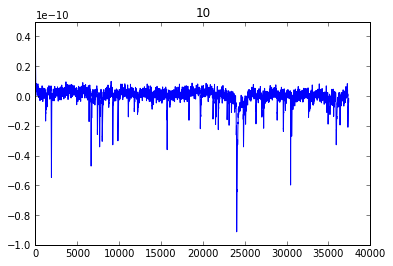

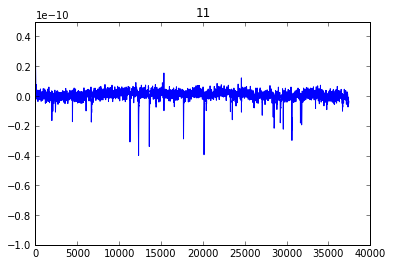

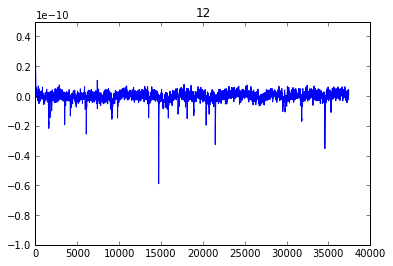

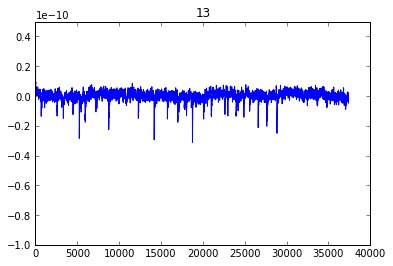

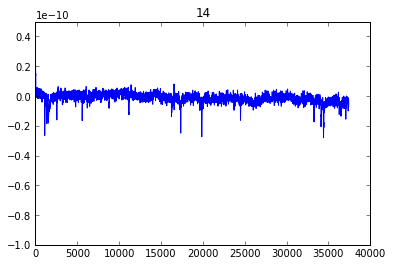

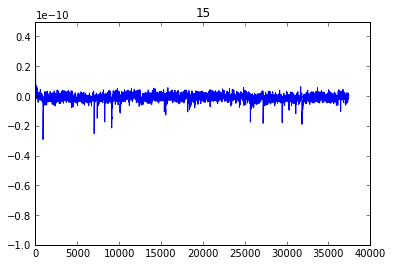

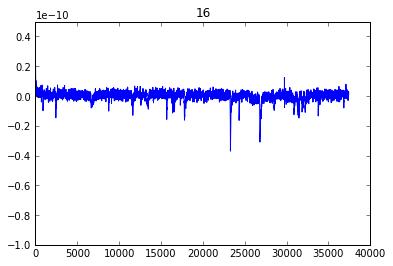

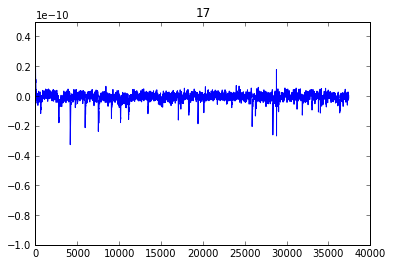

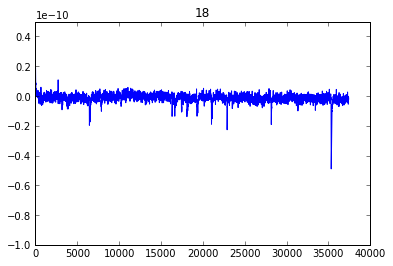

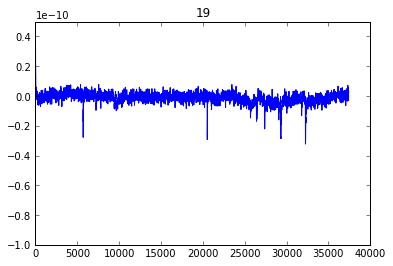

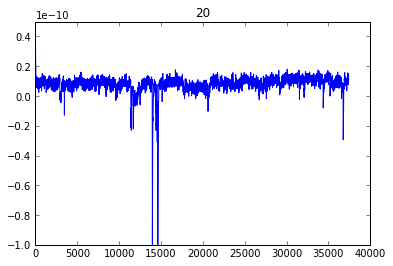

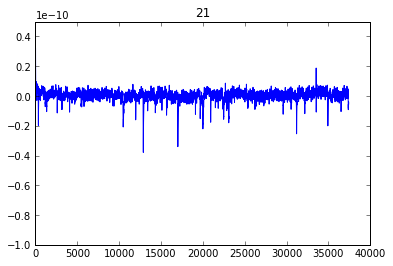

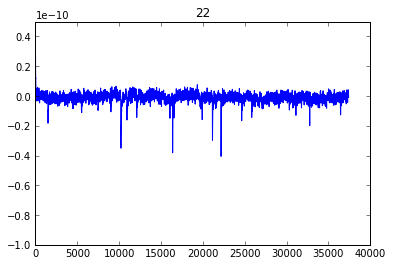

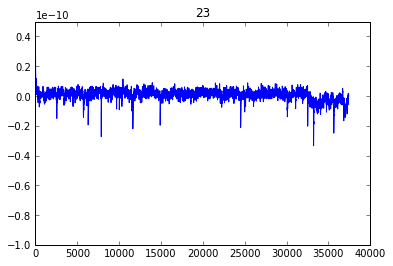

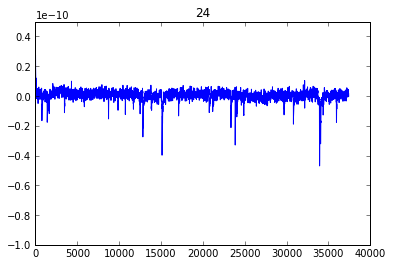

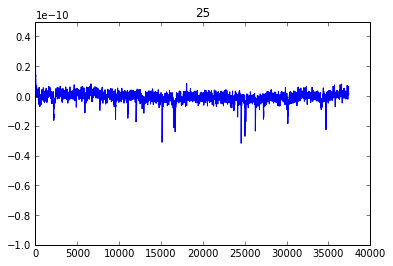

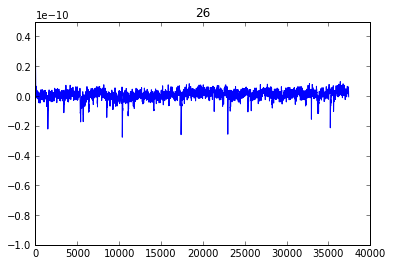

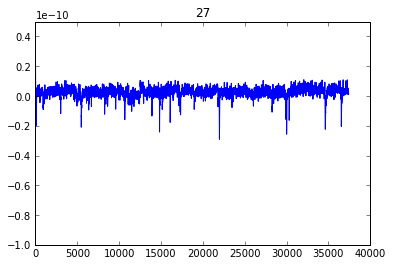

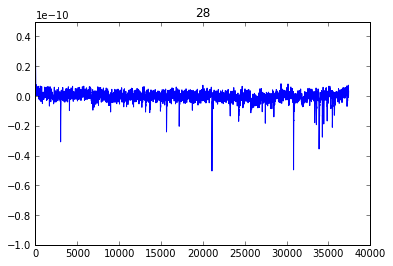

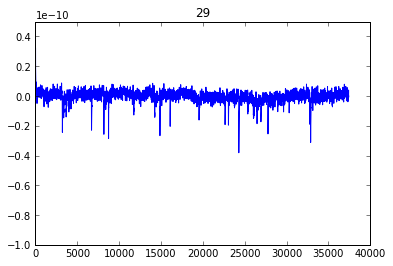

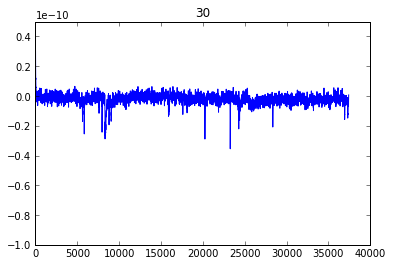

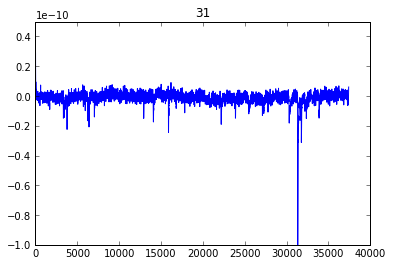

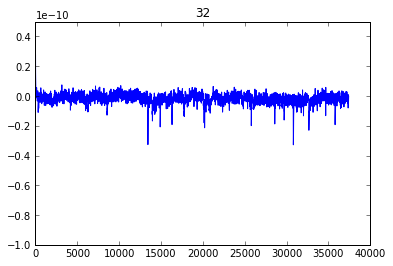

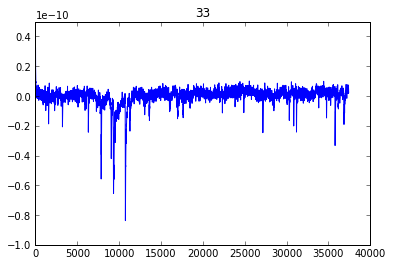

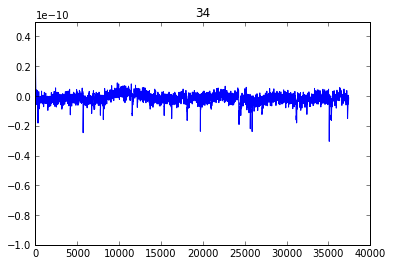

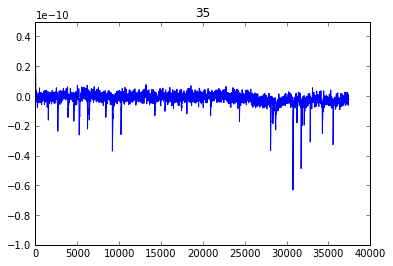

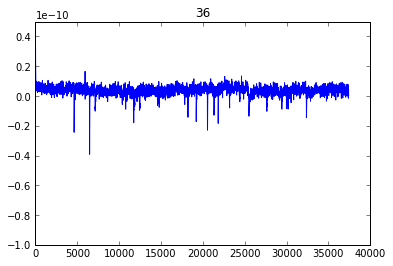

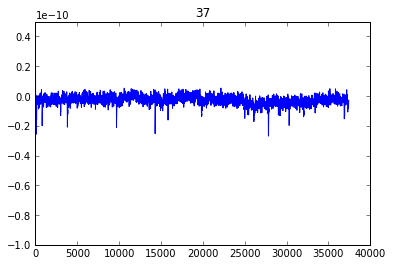

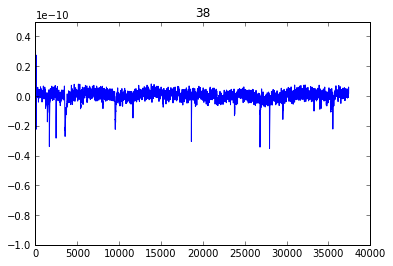

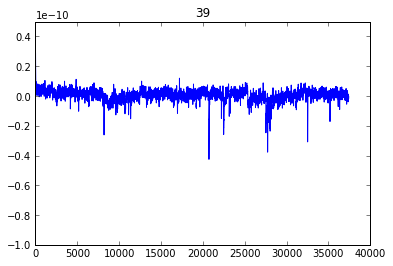

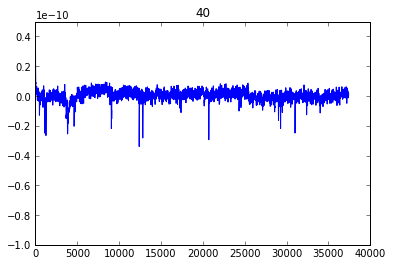

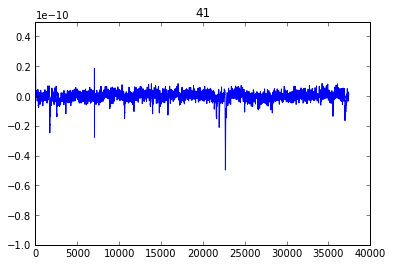

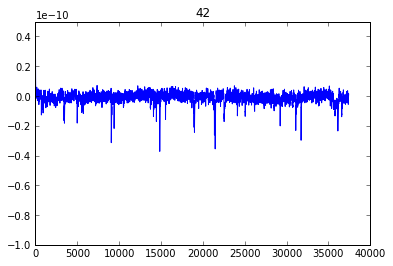

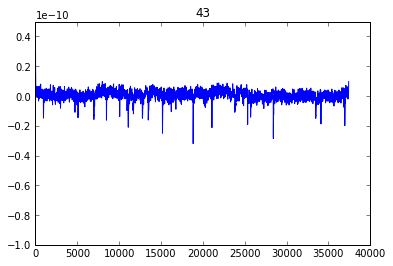

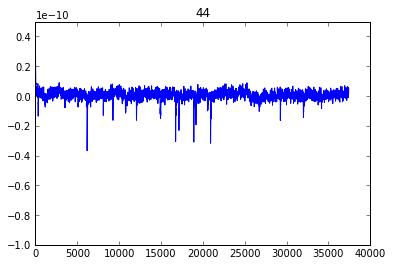

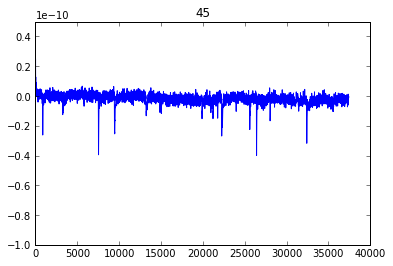

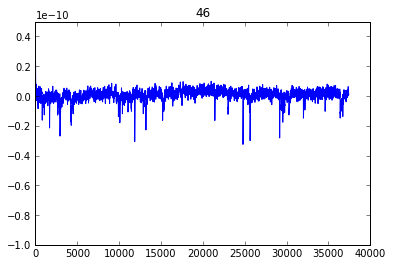

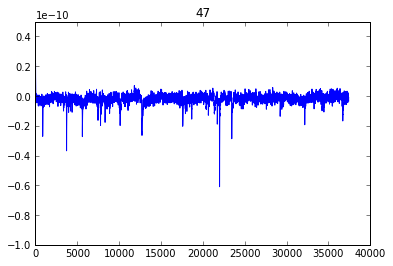

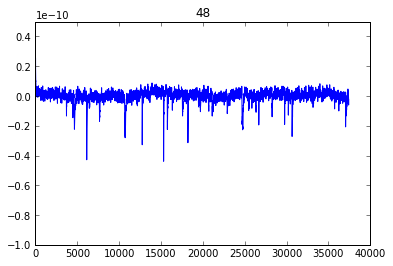

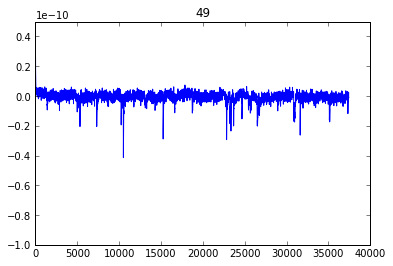

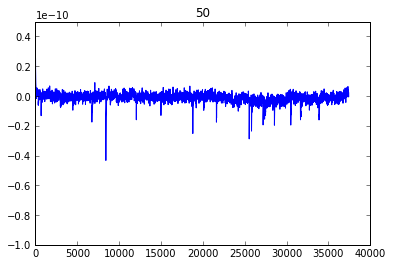

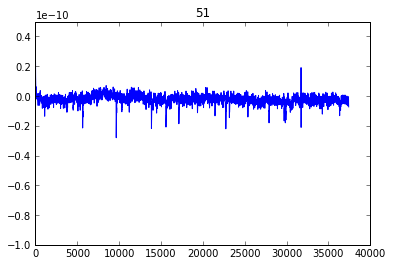

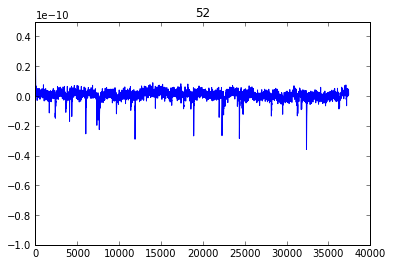

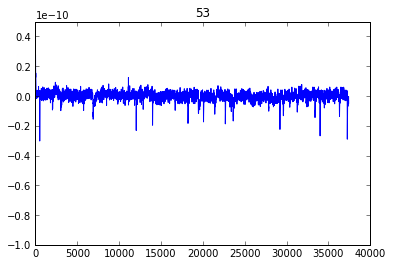

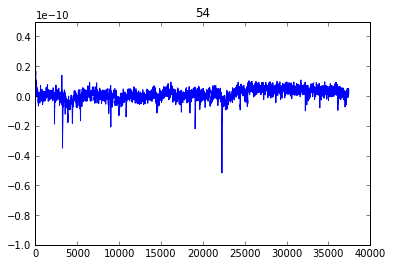

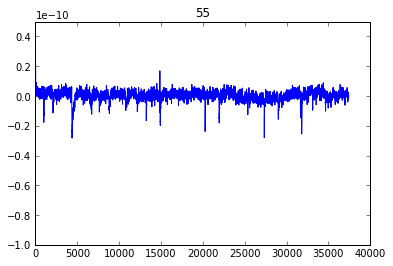

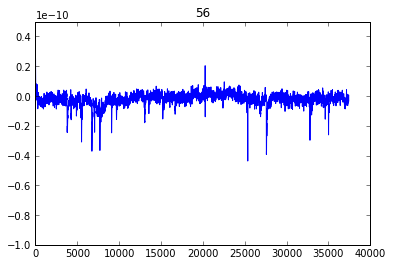

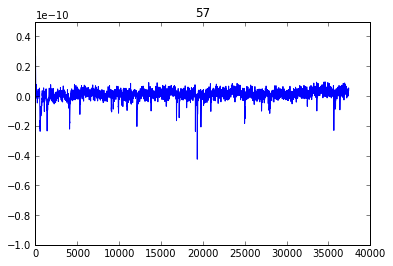

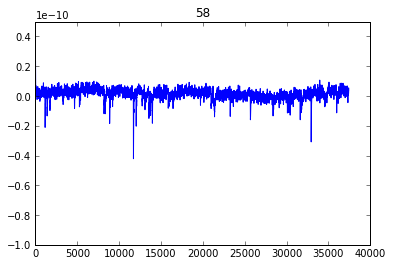

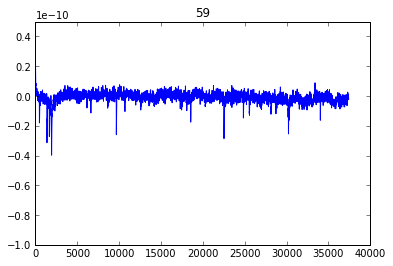

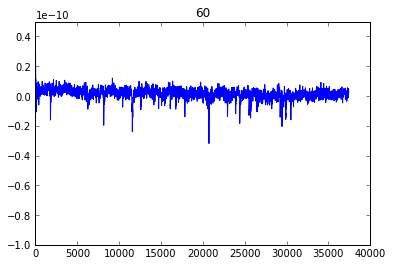

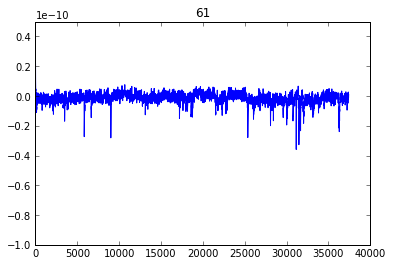

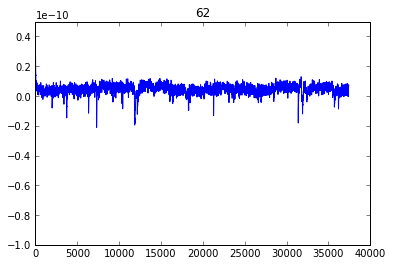

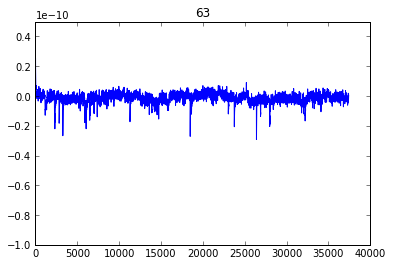

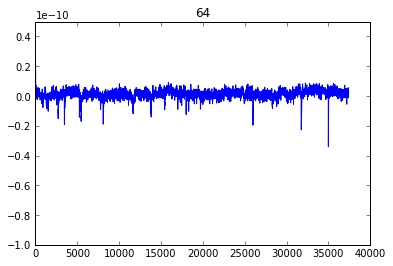

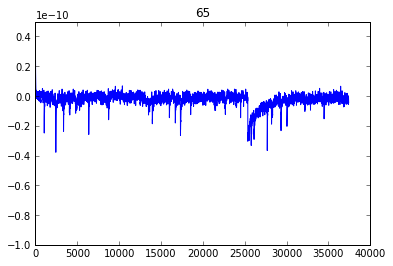

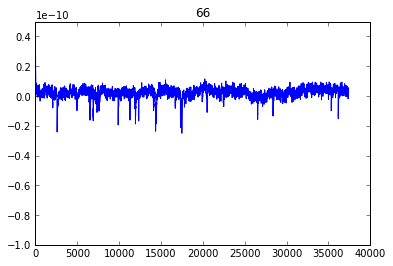

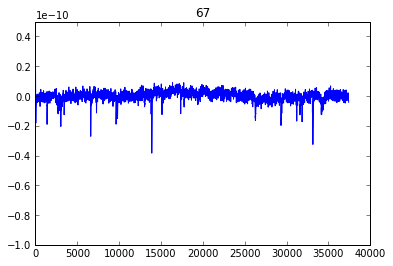

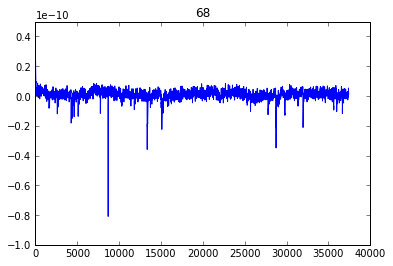

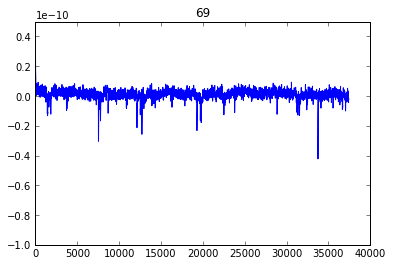

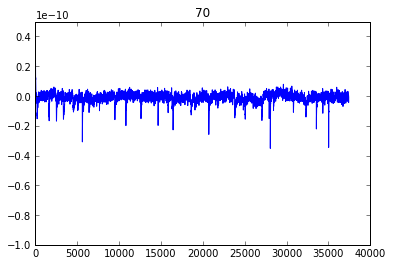

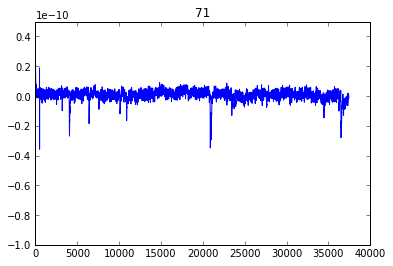

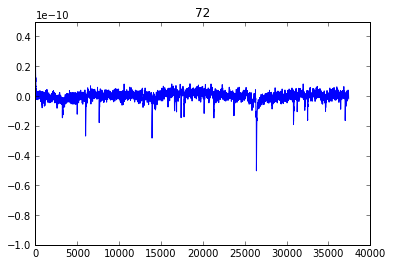

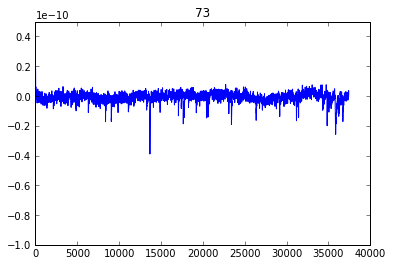

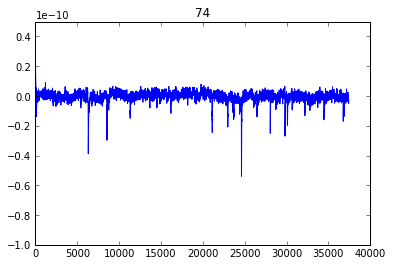

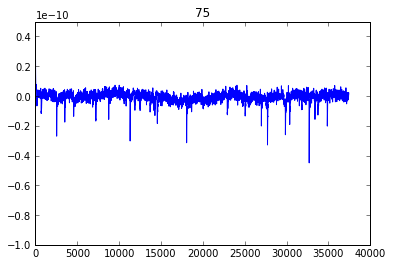

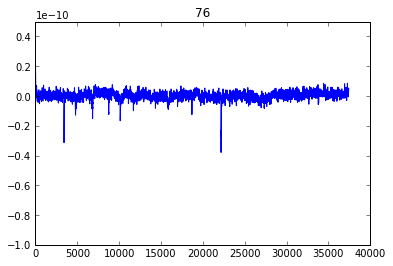

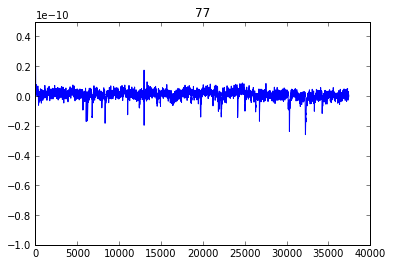

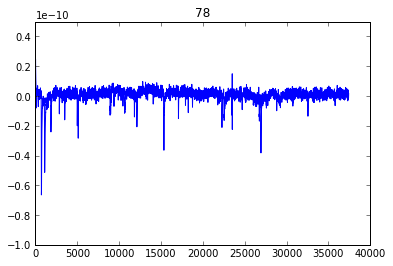

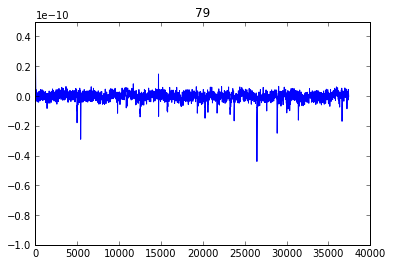

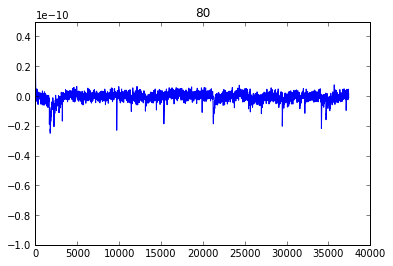

In [7]:
for i in range(len(spon_list)):
    # range(len(spon_list))
    plt.figure()
    plt.plot(spon_list[i])
    plt.title(i)
    plt.ylim([-1e-10, 0.5e-10])

In [12]:
len(spon_list[5])

46182

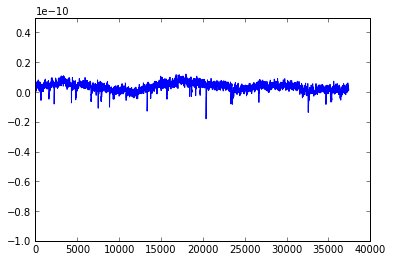

In [232]:
plt.plot(spon_list[5])
plt.ylim([-1e-10, 0.5e-10])
with PdfPages('/data/spon_example.pdf') as pdf:
    pdf.savefig()

In [ ]:
plt.plot(spon_list[5])
plt.ylim([-1e-10, 0.5e-10])

In [ ]:
pop_index = 0
while len(spon_elimi_aft[choice]) > 0:
    spon_list.pop(spon_elimi_aft[choice][-1])
    spon_elimi_aft[choice].pop(-1)

In [ ]:
spon_trace = -1 * np.hstack(spon_list)

In [ ]:
plt.plot(spon_trace)

### 1. Create preliminary template through fitting response to stimulation

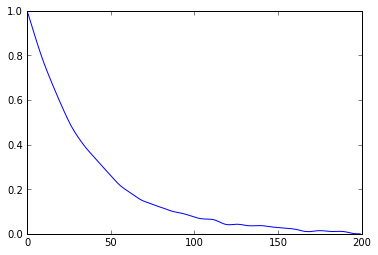

In [28]:
# Obtain response
template1 = np.mean(np.array(data_ana.After.loc[choice]['trace_y1']), axis=0)[100:300]
template1 = np.squeeze((template1 - np.min(template1))/np.max(template1 - np.min(template1)))
template1 = template1[np.argmax(template1):]
plt.plot(template1)

In [29]:
# fit with double exponential
from scipy.optimize import curve_fit

def fun_exp(t, decay_tau):
    y = np.exp(-1 * t / decay_tau)
    return y

def fun_2exp(t, a, tau1, tau2):
    y = a * np.exp(-1 * t / tau1) + (1-a) * np.exp(-1 * t / tau2)
    return y

In [30]:
xdata = np.arange(len(template1))
ydata = template1
popt, pcov = curve_fit(fun_exp, xdata, ydata)

In [31]:
pcov, popt

(array([[ 0.00649935]]), array([ 37.3029385]))

In [32]:
temp_predict = fun_exp(xdata, *popt)

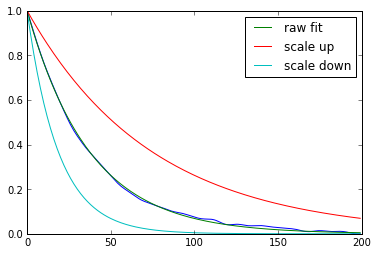

In [33]:
plt.plot(template1)
plt.plot(fun_exp(xdata, *popt), label='raw fit')
plt.plot(fun_exp(xdata, *popt*2), label='scale up')
plt.plot(fun_exp(xdata, *popt/2), label='scale down')
plt.legend()

with PdfPages('/data/fig_scale_up_down.pdf') as pdf:
    pdf.savefig()

In [199]:
# template1 = np.roll(template1, 10)

In [200]:
def func2(t, scale):
    return t * scale

In [201]:
def exp_fit(f,x,y):
    
    norm_y = (y - np.min(y)) / np.max(y - np.min(y))
    
    try: popt, popcv = curve_fit(f, x, norm_y)
    except: 
        return None, None, np.inf
        
    fit_curve = f(x, *popt) * max(y)
    error = np.nanmean(np.square(fit_curve - y))
  
    return popt, fit_curve, error

In [202]:
def findMax(trace, loc, width=50):
    start = int(max(loc-width, 0))
    end = int(min(loc+width, len(trace)))
    return start + np.argmax(trace[start:end])

def decay_fit_single(func, trace, reso=25 * 10 ** -6):
    xdata = np.arange(len(trace)) * reso
    popt1, fit_curve1, error1 = exp_fit(func, xdata, trace)
    if len(xdata) >= 300:
        popt2, fit_curve2, error2 = exp_fit(func, xdata[:-100], trace[:-100])
        # popt3, fit_curve3, error3 = exp_fit(func, xdata[:-200], trace[:-200])
        if error2 == min([error1, error2]):
            return popt2, fit_curve2, error2
        #elif error3 == min([error1, error2, error3]):
        #    return popt3, fit_curve3, error3
        
    return popt1, fit_curve1, error1

def decay_model_select(trace, reso=25 * 10 ** -6):
    
    # Fit with single exponential decay
    popt_s, fit_curve_s, error_s = decay_fit_single(fun_exp, trace)
    popt_d, fit_curve_d, error_d = decay_fit_single(fun_2exp, trace)
    
    if error_s < error_d:
        if popt_s is not None:
            return popt_s[0], fit_curve_s, error_s
        else:
            return popt_s, fit_curve_s, error_s
    else:
        if popt_d is not None:
            return min(np.abs(popt_d[1:])), fit_curve_d, error_d
        else:
            return popt_d, fit_curve_d, error_d

def onset_fit(trace, reso=25 * 10 ** -6):

    onset_trace = trace[:np.argmax(trace)]
    high_thres = onset_trace[onset_trace < np.max(trace) * 0.8]
    low_thres = onset_trace[onset_trace < np.max(trace) * 0.2]
    if len(high_thres) == 0 or len(low_thres) ==0:
        return None
    high_end = np.where(onset_trace == high_thres[-1])[0]
    low_end = np.where(onset_trace == low_thres[0])[0]
    
    return (high_end - low_end) * reso

In [203]:
def psc_search(trace, loc_ori):
    
    loc = [int(i) for i in loc_ori[0]]
    loc = np.append(loc, np.iinfo(np.int32).max)    # If two traces are very close, use the next loc as the end of previous
    trace = -1 * trace
    psc_seq = []
    for i in range(len(loc)-1):
        psc = {}
        peak_loc = np.argmax(trace[max(int(loc[i])-50, 0):min(int(loc[i])+50, len(trace))])
        psc['trace'] = trace[max(loc[i]-50 + peak_loc-50, 0):min([loc[i]-50 + peak_loc+300, loc[i+1]-50, len(trace)])]
        if len(psc['trace']) < 200:    # Control the distance of two 
            continue
        psc['amp'] = max(psc['trace']) - np.mean(psc['trace'][:10])
        if np.nanmean(psc['trace'][:10]) > 0.5 * psc['amp']:   # Control noisy level
            continue
        psc['onset_tau'] = onset_fit(psc['trace'])
        decay_tau, fitted_curve, error = decay_model_select(psc['trace'][peak_loc:])
        psc['decay_tau'] = decay_tau
        psc['decay_fit'] = fitted_curve
        psc['fit_error'] = error
        psc_seq.append(psc)
        
    return psc_seq

In [215]:
def spon_detect(trace, template, plot_low=None, plot_high=None, iffigure=False):
    
    trace = -1 * trace
    
    if plot_low is None:
        plot_low = 0
    
    if plot_high is None:
        plot_high = len(trace)
        
    fitted_scale = np.zeros(len(trace)- len(template)+1)
    fitted_bias = np.zeros(len(trace)- len(template)+1)

    for i in range(len(fitted_scale)):
        test_tmp = np.squeeze(trace[i:i+len(template)])
        popt2, _ = curve_fit(func2, template, test_tmp)
        fitted_scale[i] = popt2[0]
    
    fitted_trace = np.convolve(fitted_scale, template, mode='full')/np.sum(template)
    fitted_trace[np.where(fitted_trace<=0)[0]] = 0
    
    standard_err = np.sqrt(np.mean(np.square(fitted_trace-trace)))
    
    detection_cri = np.divide(fitted_trace, standard_err)
    
    test_diff = np.diff(detection_cri)
    loc_diff1 = np.where(test_diff>0.05)[0]
    loc_diff1_plot = loc_diff1[(loc_diff1>=plot_low)&(loc_diff1<=plot_high)]
    loc_diff1_plot = np.append(loc_diff1_plot, len(loc_diff1_plot))
    loc_diff_plot = np.diff(loc_diff1_plot)
    
    loc_plot = np.where(loc_diff_plot>1)[0]
    loc_plot = loc_plot[detection_cri[loc_diff1_plot[loc_plot]]>=2.5]
    
    # Different template may output different location for the same psc, search around the area
    output_loc = []
    for i in loc_plot:
        output_loc.append(findMax(trace, loc_diff1_plot[i]))
    if iffigure:
        plt.figure()
        plt.plot(detection_cri[plot_low: plot_high])
        plt.plot(trace[plot_low: plot_high]*1e11, alpha=0.3)
        plt.plot(loc_diff1_plot[loc_plot], np.ones(len(loc_plot)),'*')

    return output_loc

In [216]:
start = 0
length = 5000

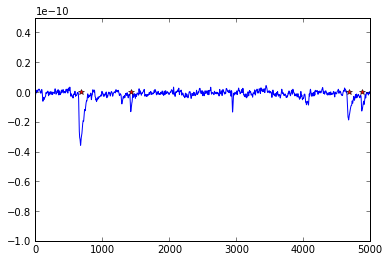

In [217]:
psc_dic = {}
chosen_idx = 2

for i in [5]:
    # range(len(spon_list))
    # detection locations of PSCs
    psc_loc_raw = spon_detect(spon_list[i], fun_exp(xdata, *popt))
    psc_loc_up = spon_detect(spon_list[i], fun_exp(xdata, *popt*2))
    psc_loc_down = spon_detect(spon_list[i], fun_exp(xdata, *popt/2))
    psc_list= list(set(np.concatenate([psc_loc_raw,psc_loc_up, psc_loc_down])))
    psc_list.sort()
    psc_loc = np.array(psc_list).reshape(1,-1)
    # Obtain amplitude, decay, onset time constant of each psc
    psc_dic[i] = psc_search(spon_list[i], psc_loc)
    
    plt.figure()
    plt.plot(spon_list[i][start:start+length])
    plt.plot(psc_loc[psc_loc<5000], np.zeros(len(psc_loc[psc_loc<5000])), 'r*')
    plt.ylim([-1e-10, 0.5e-10])

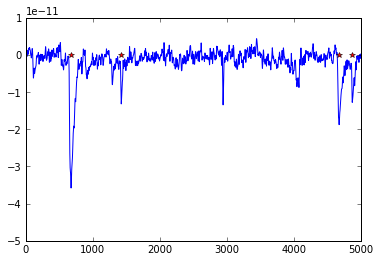

In [221]:
start=0
plt.plot(spon_list[i][start:start+length])
plt.plot(psc_loc[psc_loc<5000], np.zeros(len(psc_loc[psc_loc<5000])), 'r*')
plt.ylim([-0.5e-10, 0.1e-10])

with PdfPages('/data/detection_example.pdf') as pdf:
    pdf.savefig()

In [ ]:
#for j in range(len(psc_dic)):
#    for i in range(len(psc_dic[j])):
#        plt.figure()
#        plt.plot(psc_dic[j][i]['trace'])
#        plt.title("%d th resp, %d th trace, decay=%0.5f, error=%0.5f  " % (j, i, psc_dic[j][i]['decay_tau'], np.sqrt(psc_dic[j][i]['fit_error'])*10**10))
#        plt.plot(np.arange(len(psc_dic[j][i]['decay_fit']))+np.argmax(psc_dic[j][i]['trace']), psc_dic[j][i]['decay_fit'])
        # plt.ylim([0,7e-11])

### 2. Extract examplary large and isolated events using a high detection threshold

### 3. Create a final template by fitting a function to the average of the exemplary events

### 4. Extract all events with the final template using a low detection criterion threshold

### 5. Eliminate false-positive, add false-negative events

In [ ]:
# Create